### Main Purpose
I will use clustering on Messi's photo to determine the minimum number of colors that can help me recreate the image.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

(-0.5, 874.5, 582.5, -0.5)

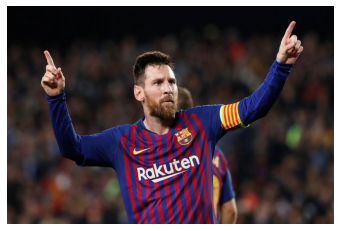

In [2]:
image = plt.imread('Lionel.Messi_.webp', format='webp')
plt.imshow(image)
plt.axis('off')

In [3]:
image.shape

(583, 875, 3)

In [4]:
n_colors = len(np.unique(image.reshape(-1,3), axis=0))

In [5]:
n_colors

74951

The image contains initially 74951 colors. 

The function below:
- takes an image and a number of clusters
- turns the 3D numpy array to 2D(pixels & colors)
- fits the data with the KMeans algorithm to the number of clusters in input 
- stores the centroids of each cluster in a new array based on the attribut labels.
- reshape the new array
- return both the reshaped new image and the inertia attributes which will serve for the elbow method later.

In [6]:
def color(image, n_clusters):

  image_reshaped = image.reshape(-1, 3)
  km = KMeans(n_clusters=n_clusters, init='k-means++', random_state = 0)
  km.fit(image_reshaped)
  new_image = image_reshaped.copy()

  for i in range(n_clusters):
    new_image[km.labels_==i,:] = km.cluster_centers_[i,:]

  final_image = new_image.reshape(image.shape)

  return (final_image, km.inertia_)


Let's get a range of integers to find out the optimal number of clusters.

In [7]:
Inertia = []
images = []
for i in range(1,25,2):
  images.append(color(image, i)[0])
  Inertia.append(color(image, i)[1])

The Elbow method helps determine the optimal number of clusters based on the inflexion point (approximately 5 or 7).

Text(0, 0.5, 'Inertia')

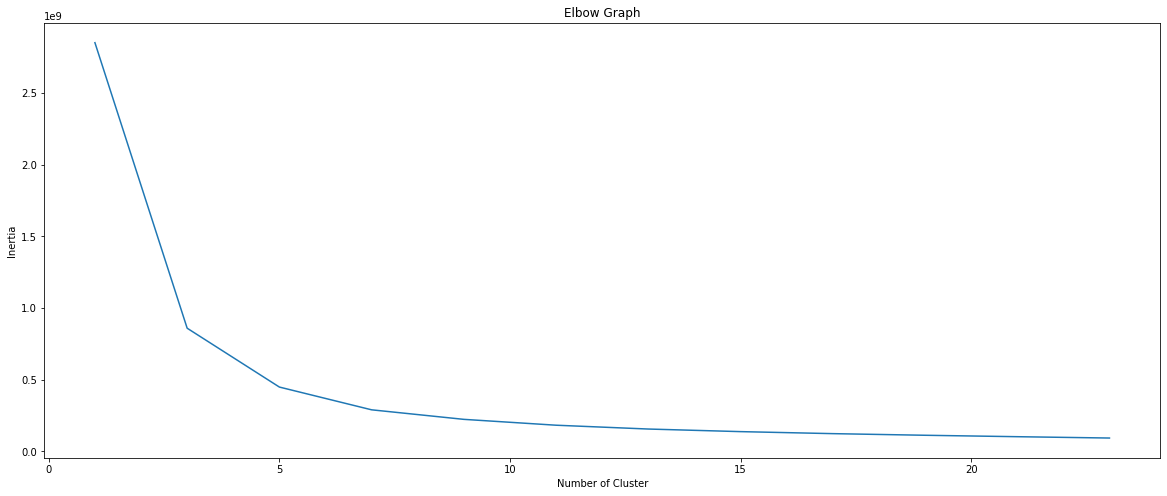

In [11]:
plt.figure(figsize=(20,8))
plt.plot([i for i in range(1,25,2)], Inertia)
plt.title('Elbow Graph')
plt.xlabel("Number of Cluster")
plt.ylabel("Inertia")

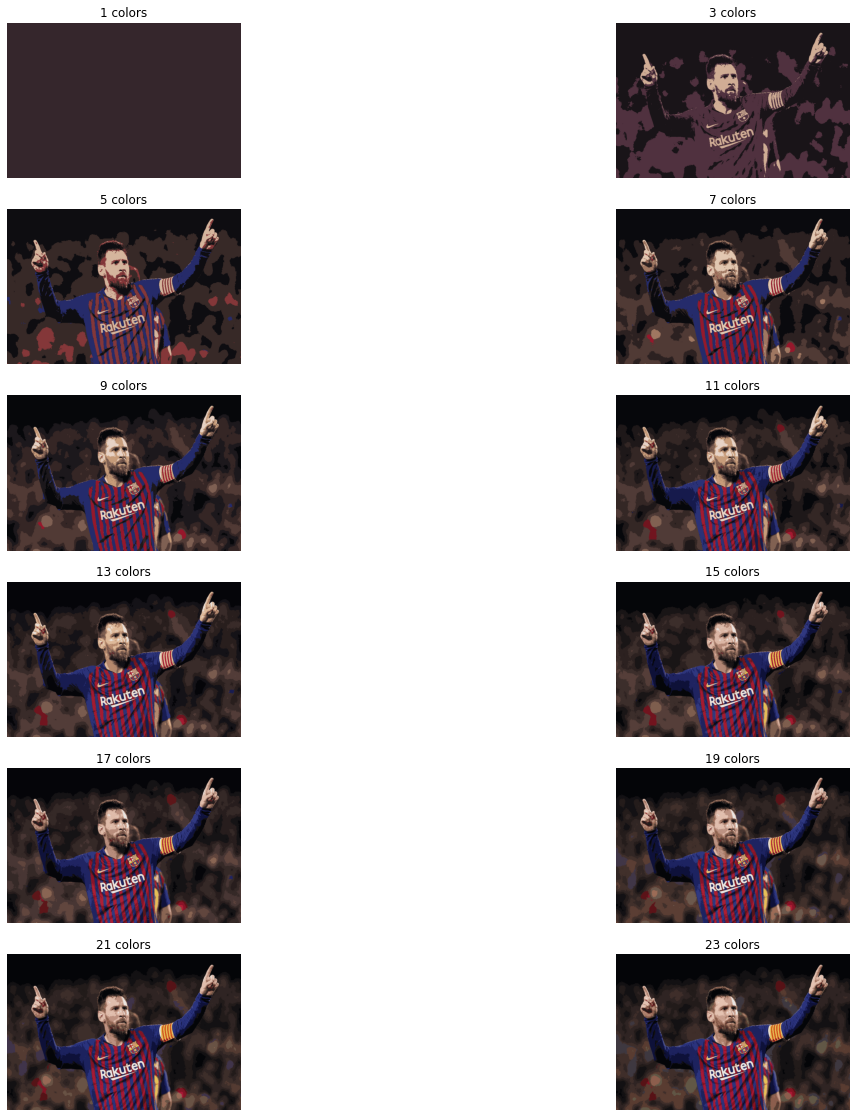

In [9]:
plt.figure(figsize=(20,20))
for i in range(12):
  plt.subplot(6,2, i+1)
  plt.imshow(images[i])
  plt.title(str(2*i+1)+' colors')
  plt.axis('off')

### Conclusion:
We can clearly notice that we can almost get the initial image from the graphs wih 5 and 7 colors.

That result matches the Elbow method which presumed that the optimal number of clusters would be 5/7.
